# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [82]:
# Replace None with your code
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sqlite3


# Create connection to database
conn=sqlite3.connect('data.sqlite')

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [83]:
# Replace None with your code
ca_high_credit_customers=pd.read_sql("""SELECT * FROM customers
            WHERE state="CA" AND creditLimit>25000;""",conn)
ca_high_credit_customers

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,,San Rafael,CA,97562,USA,1165,210500.00
1,129,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,,San Francisco,CA,94217,USA,1165,64600.00
2,161,Technics Stores Inc.,Hashimoto,Juri,6505556809,9408 Furth Circle,,Burlingame,CA,94217,USA,1165,84600.00
3,205,Toys4GrownUps.com,Young,Julie,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,1166,90700.00
4,219,Boards & Toys Co.,Young,Mary,3105552373,4097 Douglas Av.,,Glendale,CA,92561,USA,1166,11000.00
5,239,Collectable Mini Designs Co.,Thompson,Valarie,7605558146,361 Furth Circle,,San Diego,CA,91217,USA,1166,105000.00
6,321,Corporate Gift Ideas Co.,Brown,Julie,6505551386,7734 Strong St.,,San Francisco,CA,94217,USA,1165,105000.00
7,347,"Men 'R' US Retailers, Ltd.",Chandler,Brian,2155554369,6047 Douglas Av.,,Los Angeles,CA,91003,USA,1166,57700.00
8,450,The Sharp Gifts Warehouse,Frick,Sue,4085553659,3086 Ingle Ln.,,San Jose,CA,94217,USA,1165,77600.00
9,475,West Coast Collectables Co.,Thompson,Steve,3105553722,3675 Furth Circle,,Burbank,CA,94019,USA,1166,55400.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [84]:
# Replace None with your code
collect_them_all=pd.read_sql("""SELECT * 
            FROM customers
            WHERE country != 'USA'
                AND customerName LIKE '%Collect%';""",conn)
collect_them_all

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300.00
1,189,"Clover Collections, Co.",Cassidy,Dean,+353 1862 1555,25 Maiden Lane,Floor No. 4,Dublin,,2,Ireland,1504,69400.00
2,201,"UK Collectables, Ltd.",Devon,Elizabeth,(171) 555-2282,"12, Berkeley Gardens Blvd",,Liverpool,,WX1 6LT,UK,1501,92700.00
3,211,"King Kong Collectables, Co.",Gao,Mike,+852 2251 1555,Bank of China Tower,1 Garden Road,Central Hong Kong,,,Hong Kong,1621,58600.00
4,227,Heintze Collectables,Ibsen,Palle,86 21 3555,Smagsloget 45,,Århus,,8200,Denmark,1401,120800.00
5,260,"Royal Canadian Collectables, Ltd.",Lincoln,Elizabeth,(604) 555-4555,23 Tsawassen Blvd.,,Tsawassen,BC,T2F 8M4,Canada,1323,89600.00
6,293,BG&E Collectables,Harrison,Ed,+41 26 425 50 01,Rte des Arsenaux 41,,Fribourg,,1700,Switzerland,,0.00
7,353,Reims Collectables,Henriot,Paul,26.47.1555,59 rue de l'Abbaye,,Reims,,51100,France,1337,81100.00
8,376,Precious Collectables,Urs,Braun,0452-076555,Hauptstr. 29,,Bern,,3012,Switzerland,1702,0.00
9,382,Salzburg Collectables,Pipps,Georg,6562-9555,Geislweg 14,,Salzburg,,5020,Austria,1401,71700.00


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!
When I use the WHERE clause, I start by selecting all the columns from the customers table, then I filter the results to include only international customers (those not living in the USA) by using country != 'USA'. I also filter further by checking which customer names contain the word "Collect" with customerName LIKE '%Collect%'. The LIKE keyword performs a partial match, while the % symbols act as wildcards, meaning they allow any characters to appear before or after the word "Collect". This ensures that any customer name containing "Collect" — regardless of its position in the name — will be included in the results.I assigned the results in 'collect_them_all' variable to show the results. 

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [85]:
# Replace None with your code

state_av_credit_limits=pd.read_sql("""SELECT state, AVG(creditLimit) AS avg_credit_limit
                                   FROM customers
                                   WHERE country="USA"
                                   GROUP BY state
                                   ORDER BY avg_credit_limit DESC;""",conn)
state_av_credit_limits

,state,avg_credit_limit
0,NH,114200.000000
1,NY,89966.666667
2,PA,84766.666667
3,CA,83854.545455
4,NV,71800.000000
5,MA,70755.555556
6,CT,57350.000000
7,NJ,43000.000000


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

[Text(0.5, 0, 'Average Credit Limit'),
 Text(0, 0.5, 'State'),
 Text(0.5, 1.0, 'Average Customer Credit Limit by U.S. State')]

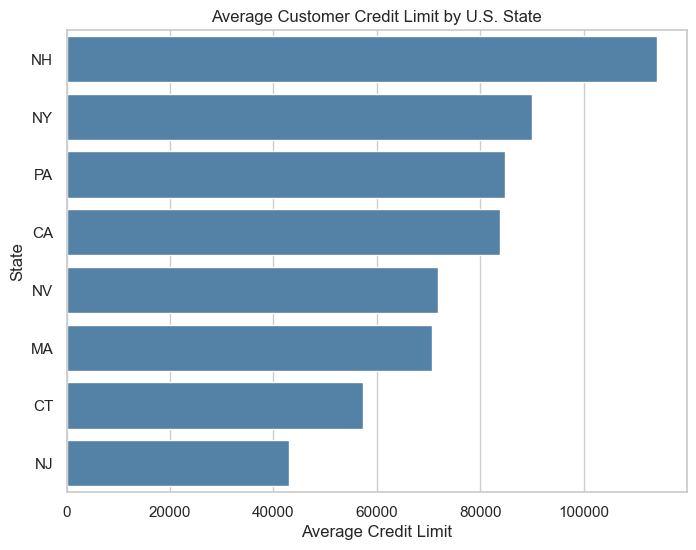

In [86]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(data=state_av_credit_limits, x="avg_credit_limit",y="state",color="steelblue")
ax.set(xlabel="Average Credit Limit", ylabel="State", title="Average Customer Credit Limit by U.S. State")

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [87]:
# Replace None with your code
top10_customers=pd.read_sql(""" SELECT c.customerName,SUM(p.amount)AS total_payment
                            FROM customers AS c 
                            JOIN payments AS p USING(customerNumber)
                            GROUP BY c.customerName
                            ORDER BY total_payment DESC
                            LIMIT 10;""",conn)
top10_customers

,customerName,total_payment
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

[Text(0.5, 0, 'Total Payment'),
 Text(0, 0.5, 'Customer Name'),
 Text(0.5, 1.0, "Top 10 Customer's Total payment")]

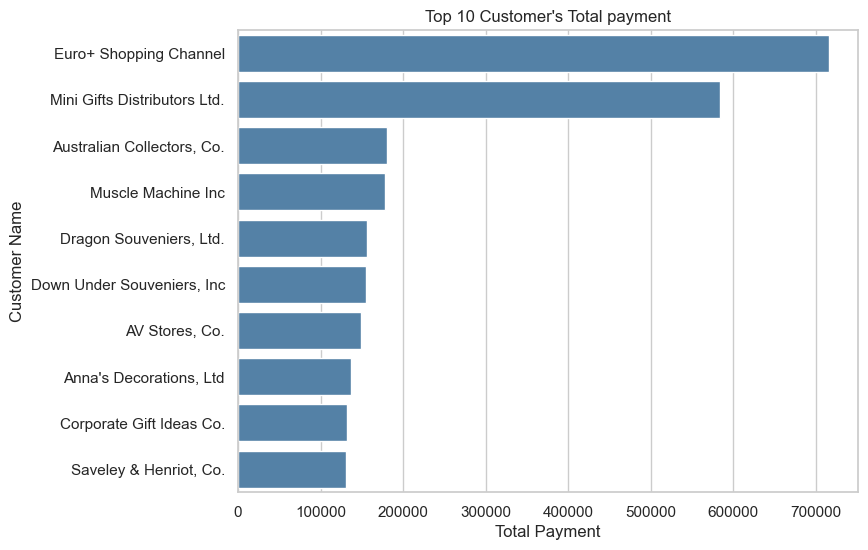

In [88]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(data = top10_customers, x="total_payment",y="customerName",color="steelblue")
ax.set(xlabel="Total Payment", ylabel="Customer Name", title="Top 10 Customer's Total payment")

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [89]:
# Replace None with you code
pd.read_sql("""SELECT c.customerName,p.productName,SUM(quantityOrdered) AS total_quantity
            FROM customers AS c
            JOIN orders AS o USING(customerNumber)
            JOIN orderdetails As od USING(orderNumber)
            JOIN products as p USING(productCode)
            GROUP BY c.customerName,p.productName
            HAVING total_quantity>=10
            ORDER BY total_quantity ASC;""",conn)


,customerName,productName,total_quantity
0,"Extreme Desk Decorations, Ltd",1961 Chevrolet Impala,10
1,Petit Auto,1913 Ford Model T Speedster,10
2,La Rochelle Gifts,1954 Greyhound Scenicruiser,11
3,Tekni Collectables Inc.,American Airlines: B767-300,11
4,The Sharp Gifts Warehouse,1969 Chevrolet Camaro Z28,13
...,...,...,...
2526,Euro+ Shopping Channel,2002 Chevy Corvette,174
2527,Euro+ Shopping Channel,1957 Chevy Pickup,183
2528,Euro+ Shopping Channel,1970 Dodge Coronet,197
2529,Euro+ Shopping Channel,1958 Chevy Corvette Limited Edition,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [ ]:
# Replace None with your code
product_line_analysis=pd.read_sql("""   SELECT p.productLine,
                                            SUM(od.quantityOrdered) AS total_quantity_ordered,
                                        COUNT(DISTINCT p.productCode) AS num_products
                                        FROM products AS p
                                        JOIN orderdetails AS od USING(productCode)
                                        GROUP BY p.productLine
                                        ORDER BY total_quantity_ordered DESC;""",conn)
product_line_analysis

,productLine,total_quantity_ordered,num_products
0,Classic Cars,35582,37
1,Vintage Cars,22933,24
2,Motorcycles,12778,13
3,Planes,11872,12
4,Trucks and Buses,11001,11
5,Ships,8532,9
6,Trains,2818,3


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

[Text(0.5, 0, 'Number of Products'),
 Text(0, 0.5, 'Total Quantity Ordered'),
 Text(0.5, 1.0, 'Product Line Analysis: Variety vs Total Orders')]

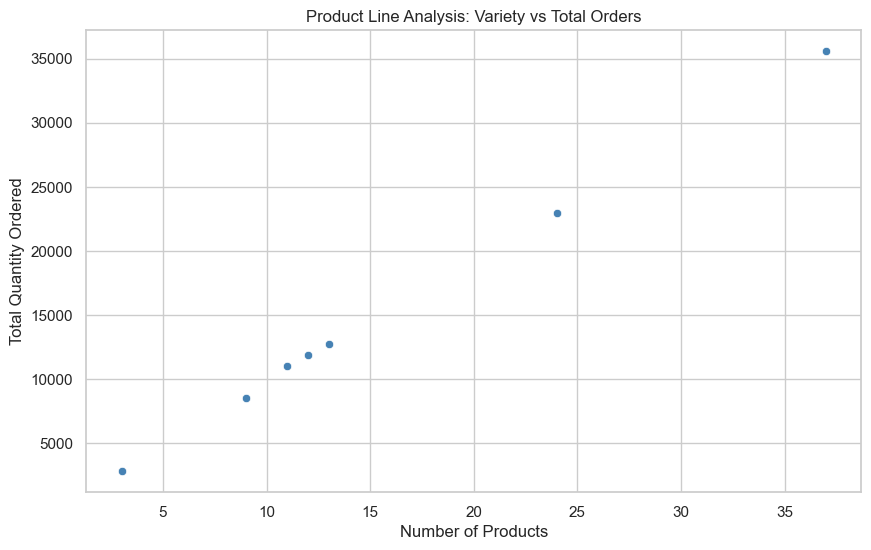

In [91]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data = product_line_analysis,x="num_products", y="total_quantity_ordered",color="steelblue")
ax.set(xlabel="Number of Products",ylabel="Total Quantity Ordered", title="Product Line Analysis: Variety vs Total Orders")

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer in markdown here!
I chose a scatter plot for this visualization because it is the most effective way to explore and highlight the relationship between two numerical variables — the total quantity ordered and the number of products in each product line. The scatter plot makes it easy to see that product lines with more products generally tend to have higher total orders. For example, Classic Cars stands out with both the highest number of products and the largest total quantity ordered, while Trains has the lowest values on both axes. This visualization provides a clear, intuitive way to compare product line variety with overall demand.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [92]:
# Replace None with your code
small_offices = pd.read_sql("""
                            SELECT e.firstName,e.lastName,e.jobTitle,e.officeCode,
                            m.firstName AS supervisorFirstName,m.lastName AS supervisorLastName
                            FROM employees AS e
                            LEFT JOIN employees AS m
                                ON e.reportsTo = m.employeeNumber
                            WHERE e.officeCode IN (
                                                    SELECT officeCode
                                                    FROM employees
                                                    GROUP BY officeCode
                                                    HAVING COUNT(employeeNumber) < 5);""", conn)
small_offices

,firstName,lastName,jobTitle,officeCode,supervisorFirstName,supervisorLastName
0,William,Patterson,Sales Manager (APAC),6,Mary,Patterson
1,Julie,Firrelli,Sales Rep,2,Anthony,Bow
2,Steve,Patterson,Sales Rep,2,Anthony,Bow
3,Foon Yue,Tseng,Sales Rep,3,Anthony,Bow
4,George,Vanauf,Sales Rep,3,Anthony,Bow
5,Larry,Bott,Sales Rep,7,Gerard,Bondur
6,Barry,Jones,Sales Rep,7,Gerard,Bondur
7,Andy,Fixter,Sales Rep,6,William,Patterson
8,Peter,Marsh,Sales Rep,6,William,Patterson
9,Tom,King,Sales Rep,6,William,Patterson


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!
I designed the subquery to identify which offices have fewer than 5 employees by grouping the employees table by officeCode and applying the COUNT function with a HAVING clause. This subquery returns a list of office codes that meet the condition. In the main query, I used this list with a WHERE ... IN statement to filter and return only employees who belong to those small offices. This approach ensures that we are dynamically selecting employees based on office size, without hardcoding any office codes. Additionally, the main query joins the employees table with itself to retrieve supervisor names, while still applying the small office filter from the subquery.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [93]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [94]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

# SQL Summative Lab – Part 2: Exploratory Movie Analysis

In this section, I explore data from the IMDB database (2010–2019) using SQL and Pandas.  
The main objectives are:
- Perform an **initial exploration** to identify interesting patterns in genres, ratings, popularity, and runtimes.
- Formulate a **business question** based on observed trends.
- Identify **data cleaning tasks** that would be necessary for deeper analysis.

**Key Tables Used:**  
- 'movie_basics' – Contains movie metadata (title, start year, runtime, genres).  
- 'movie_ratings' – Contains average ratings and number of votes per movie.

In [95]:
# Begin your code here
#Some info about movie_basics table
pd.read_sql(""" SELECT * FROM movie_basics;""",conn4).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [96]:
#Checking the table structure 
pd.read_sql(""" SELECT * FROM movie_basics;""",conn4).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [97]:
#Some info about movie_ratings table
pd.read_sql(""" SELECT * FROM movie_ratings;""",conn4).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [98]:
#Checking the table structure 
pd.read_sql(""" SELECT * FROM movie_ratings;""",conn4).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [99]:
#Calculating average ratings and total votes 
avg_rating_by_genre=pd.read_sql("""SELECT COUNT(movie_id) AS number_of_movies,genres,
                                        AVG(averagerating) AS avg_rating,
                                        SUM(numvotes) AS total_votes
                                    FROM movie_basics 
                                    JOIN movie_ratings USING(movie_id)
                                    WHERE start_year BETWEEN 2010 AND 2019 AND genres IS NOT NULL
                                    GROUP BY genres
                                    HAVING COUNT(movie_id) >= 10
                                    ORDER BY avg_rating DESC;""",conn4)
avg_rating_by_genre

,number_of_movies,genres,avg_rating,total_votes
0,16,"Documentary,Family,Sport",8.062500,880
1,19,"Action,Documentary,Sport",7.863158,3340
2,10,"Biography,Documentary,Musical",7.840000,466
3,19,"Documentary,Family,News",7.721053,916
4,23,"Documentary,Family,Music",7.686957,2389
...,...,...,...,...
355,10,"Horror,Mystery,Romance",4.670000,14033
356,80,"Action,Horror,Sci-Fi",4.656250,721869
357,89,"Horror,Sci-Fi",4.626966,80489
358,52,"Action,Adventure,Horror",4.525000,952522


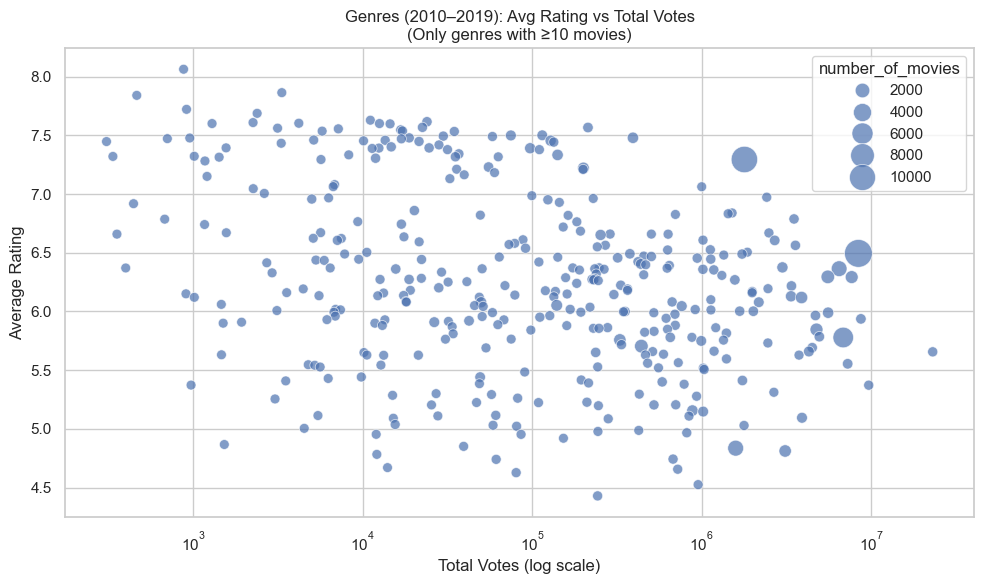

In [100]:
#Creating a scatterplot to show relation between total votes and average rating
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(
    data=avg_rating_by_genre,
    x="total_votes", 
    y="avg_rating",
    size="number_of_movies",
    sizes=(50, 400),
    alpha=0.7
)

ax.set(
    xscale="log",
    xlabel="Total Votes (log scale)",
    ylabel="Average Rating",
    title="Genres (2010–2019): Avg Rating vs Total Votes\n(Only genres with ≥10 movies)"
)
plt.tight_layout()
plt.show()

### Genre Analysis (2010–2019)

- Genres with documentary components (e.g., *Documentary, Family, Sport*) show the **highest average ratings** (around 7.5–8).
- Large, mainstream genres (e.g., *Action, Adventure, Sci-Fi*) have **very high total votes** but average ratings closer to 6–7.
- The scatter plot highlights a **trade-off between quality (rating) and popularity (votes)** across genres.

In [101]:
#Showing runtimes between 40-240 minutes and sorting them descending
runtimes = pd.read_sql("""
                        SELECT movie_id,primary_title,runtime_minutes
                        FROM movie_basics
                        WHERE start_year BETWEEN 2010 AND 2019
                            AND runtime_minutes IS NOT NULL
                            AND runtime_minutes BETWEEN 40 AND 240
                        ORDER BY runtime_minutes DESC;""", conn4)
runtimes

,movie_id,primary_title,runtime_minutes
0,tt1949208,La vie privée du cinéma,240.0
1,tt2199259,Aliens from Outer Space,240.0
2,tt2199265,Ancient Astronauts: Our Extraterrestrial Legacy,240.0
3,tt2290833,"Why Quilts Matter: History, Art & Politics",240.0
4,tt2705414,Born in Beijing,240.0
...,...,...,...
108895,tt9050372,Il Signor Jackson,40.0
108896,tt9188018,Lies and Miracles: Childhood in a Siberian Lab...,40.0
108897,tt9204606,Life Overtakes Me,40.0
108898,tt9375212,Camp Siberia,40.0


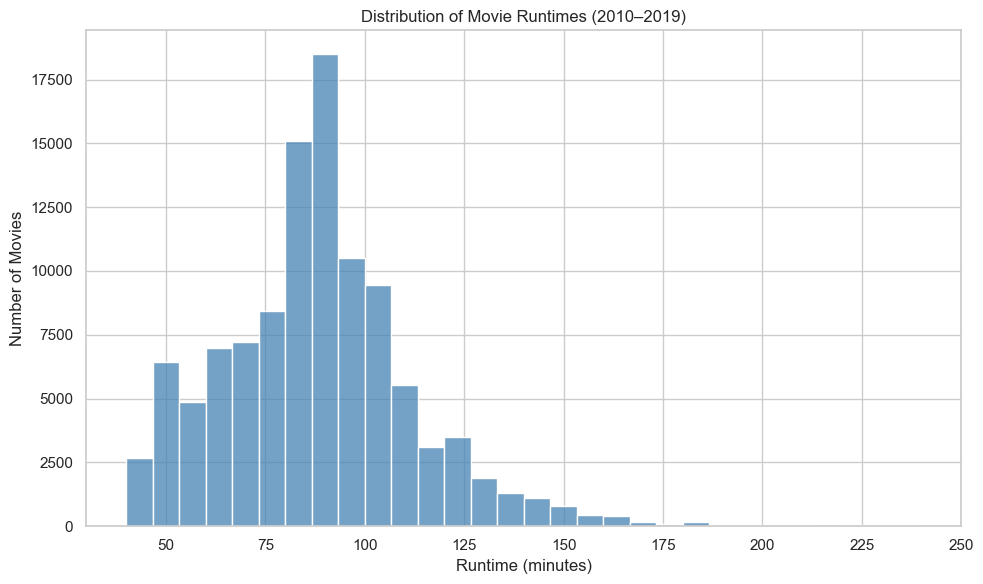

In [102]:
#Creating a histogram to show runtime minutes distribution 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=runtimes['runtime_minutes'],bins=30,color="steelblue")

ax.set(
    xlabel="Runtime (minutes)",
    ylabel="Number of Movies",
    title="Distribution of Movie Runtimes (2010–2019)"
)
plt.tight_layout()
plt.show()

### Runtime Distribution

- Most movies released between 2010–2019 are between **80–120 minutes**, peaking around 90 minutes.
- There are **few extreme outliers** (above 150 minutes), which we trimmed by selecting runtimes between 40–240 minutes.
- The runtime distribution is **right-skewed**, with a small number of longer films.

In [103]:
#selecting the top 20 movies based on number of votes
top20_popular = pd.read_sql(""" SELECT 
                                    mb.primary_title, mb.start_year, 
                                    mb.genres,mr.averagerating, mr.numvotes
                                FROM movie_basics mb
                                JOIN movie_ratings mr USING(movie_id)
                                WHERE mb.start_year BETWEEN 2010 AND 2019
                                ORDER BY mr.numvotes DESC
                                LIMIT 20;""", conn4)
top20_popular

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


### Most Popular Movies

- The most-voted movies are **mainstream blockbusters**, such as *Inception*, *The Dark Knight Rises*, and *Interstellar*.
- These movies typically fall under **Action, Adventure, or Sci-Fi** genres and have vote counts in the **hundreds of thousands to millions**.

## Part 2 Summary

**Business Question:**  
Which genres (2010–2019) offer the best balance between **audience quality (average rating)** and **market reach (total votes)**, after excluding small-sample genres?

**Key Findings:**  
- Documentary-related genres have the highest ratings but lower popularity (votes).
- Action and Adventure genres dominate in total votes but have moderate ratings (6–7).
- Most movies fall within 90–120 minutes in runtime.

**Data Cleaning Tasks Identified:**  
- Excluded nulls in 'genres' and 'runtime_minutes'.
- Applied year filter (2010–2019).
- Trimmed extreme runtimes (40–240 minutes).
- Filtered out genres with fewer than 10 movies to stabilize averages.
- Considered the need to split multi-genre strings for deeper analysis.

In [104]:
conn4.close()